# 1. Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import accuracy_score

# 2. Read Datasets

In [9]:
diabetes = datasets.load_diabetes()

In [10]:
feature_df = diabetes.data
target_df = diabetes.target

In [11]:
print(feature_df.shape)
print(target_df.shape)

(442, 10)
(442,)


In [12]:
target_df

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

# 3. Create binary labels

In [16]:
median_measurement = np.median(target_df)
print(median_measurement)

140.5


In [20]:
target_zero_one = np.array(target_df > median_measurement, dtype=int)
target_zero_one

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

# 4. Feature Selection

In [105]:
diabetes_x = feature_df[:,(2,8)] # diabetes_x = feature_df[:,2].reshape(442,1)
print(diabetes_x.shape)

(442, 2)


In [106]:
diabetes_y = target_zero_one
print(diabetes_y.shape)

(442,)


# 5. Split into Training & Test set

In [107]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    diabetes_x, diabetes_y, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 2)
(133, 2)
(309,)
(133,)


# 6. Create Model object

In [108]:
model = linear_model.LogisticRegression(n_jobs=-1) # n_jobs = -1 가장 큰 cpu 코어값으로 돌리겠다 
model

LogisticRegression(n_jobs=-1)

# 7. Train Model object

In [109]:
model.fit(x_train, y_train)

LogisticRegression(n_jobs=-1)

# 8. Test Model Object

In [110]:
pred_test = model.predict_proba(x_test)

In [111]:
model.predict(x_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1])

In [112]:
print("Accuracy socre: ",accuracy_score(model.predict(x_test),y_test))

Accuracy socre:  0.8421052631578947


# 9. Visualization

In [113]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1])

In [114]:
roc_auc = auc(fpr, tpr)

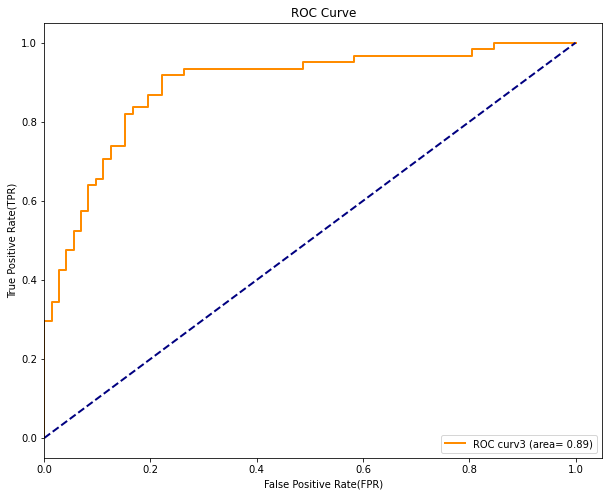

In [115]:
%matplotlib inline
plt.figure(figsize=(10,8))

plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curv3 (area= %.2f)"%roc_auc) # roc curve
plt.plot([0, 1],[0, 1], color='navy', lw=2, linestyle="--") # random classification roc curve

plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])

plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.legend(loc="lower right") # 범례
plt.title("ROC Curve")

plt.show()

In [54]:
fpr

array([0.        , 0.        , 0.        , 0.01388889, 0.01388889,
       0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.04166667,
       0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.06944444,
       0.06944444, 0.08333333, 0.08333333, 0.09722222, 0.09722222,
       0.11111111, 0.11111111, 0.125     , 0.125     , 0.13888889,
       0.13888889, 0.15277778, 0.15277778, 0.16666667, 0.16666667,
       0.18055556, 0.18055556, 0.26388889, 0.30555556, 0.34722222,
       0.34722222, 0.375     , 0.38888889, 0.45833333, 0.51388889,
       0.56944444, 0.625     , 0.625     , 0.63888889, 0.65277778,
       0.68055556, 0.69444444, 0.75      , 0.77777778, 0.84722222,
       0.875     , 0.90277778, 0.93055556, 0.93055556, 1.        ])

# 10. Searching for Proper features

In [68]:
from itertools import combinations

In [93]:
possible_comb = []
total_feature_length = range(len(diabetes.feature_names))
for i in total_feature_length:
        possible_comb.append(list(combinations(total_feature_length, i)))
possible_comb

[[()],
 [(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)],
 [(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (0, 9),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 6),
  (2, 7),
  (2, 8),
  (2, 9),
  (3, 4),
  (3, 5),
  (3, 6),
  (3, 7),
  (3, 8),
  (3, 9),
  (4, 5),
  (4, 6),
  (4, 7),
  (4, 8),
  (4, 9),
  (5, 6),
  (5, 7),
  (5, 8),
  (5, 9),
  (6, 7),
  (6, 8),
  (6, 9),
  (7, 8),
  (7, 9),
  (8, 9)],
 [(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 1, 5),
  (0, 1, 6),
  (0, 1, 7),
  (0, 1, 8),
  (0, 1, 9),
  (0, 2, 3),
  (0, 2, 4),
  (0, 2, 5),
  (0, 2, 6),
  (0, 2, 7),
  (0, 2, 8),
  (0, 2, 9),
  (0, 3, 4),
  (0, 3, 5),
  (0, 3, 6),
  (0, 3, 7),
  (0, 3, 8),
  (0, 3, 9),
  (0, 4, 5),
  (0, 4, 6),
  (0, 4, 7),
  (0, 4, 8),
  (0, 4, 9),
  (0, 5, 6),
  (0, 5, 7),
  (0, 5, 8),
  (0, 5, 9),
  (0, 6, 7),
  (0, 6, 8),
  (0, 6, 9),
  (0, 7, 8),
  (0, 7, 9),
  (0, 8, 9),
  (1, 2, 3)

In [85]:
# list comprehension
flat_possible_comb = [item for sublist in possible_comb for item in sublist if item != ()]

In [86]:
flat_possible_comb

[(0,),
 (1,),
 (2,),
 (3,),
 (4,),
 (5,),
 (6,),
 (7,),
 (8,),
 (9,),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 9),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 2, 7),
 (1, 2, 8),
 (1, 2, 9),
 (1, 3, 4

In [91]:
from tqdm import tqdm

score_dict = {}
for comb in tqdm(flat_possible_comb):
    diabetes_x = feature_df[:,comb]
    diabetes_y = target_zero_one
    
    x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_x, diabetes_y, test_size=0.3, random_state=42)
    model = linear_model.LogisticRegression()
    model.fit(x_train, y_train)
    pred_test = model.predict_proba(x_test)
#     model.predict(x_test)
    score = accuracy_score(model.predict(x_test), y_test)
    score_dict[comb] = score

100%|█████████████████████████████████████████████████████████████████████████████| 1022/1022 [00:02<00:00, 427.66it/s]


In [97]:
max_score = sorted(score_dict.values(), reverse=True)[0]
print(max_score)

0.8421052631578947


In [101]:
for pair, score in score_dict.items():
    if score == max_score:
        print('Score: ', max_score, " Pair: ", pair)

Score:  0.8421052631578947  Pair:  (2, 8)


In [102]:
print(diabetes.feature_names[2])
print(diabetes.feature_names[8])

bmi
s5
